In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions

In [2]:
df = pd.read_csv("C:/Users/Gustavo/Documents/GitHub/Machine-Learning-Ciencia-de-Dados-UTFPR/datasets/breast_cancer.csv")

In [3]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [4]:
list(df.columns)

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [5]:
df_clean = df.drop(['id', 'diagnosis', 'Unnamed: 32'], axis=1)
X = df_clean.values
print(X.shape)

(569, 30)


In [6]:
labels = {'M': 1, 'B': 0}

df['diag_class'] = df['diagnosis'].map(labels)

In [7]:
y = df['diag_class'].values
y[:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, shuffle=True, random_state=123, stratify = y)

print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train:', np.bincount(y_train))
print('Labels counts in y_test:', np.bincount(y_test))

Labels counts in y: [357 212]
Labels counts in y_train: [250 148]
Labels counts in y_test: [107  64]


In [9]:
pipe = Pipeline(steps=[
    ('z-score', StandardScaler()), 
    ('reduce_dim', PCA()), 
    ('dec_tree', DecisionTreeClassifier())])

In [10]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('z-score', StandardScaler()), ('reduce_dim', PCA()),
                ('dec_tree', DecisionTreeClassifier())])

In [11]:
from sklearn.metrics import accuracy_score

y_test_pred = pipe.predict(X_test)
accuracy_score(y_test, y_test_pred )

0.9298245614035088

In [12]:
param_grid = {
    'reduce_dim__n_components': list(range(1, 11)),
    'dec_tree__criterion': ['gini', 'entropy'],
    'dec_tree__max_depth': list(range(1, 11)),
    'dec_tree__min_samples_leaf': list(range(1, 11))
}

grid = GridSearchCV(pipe, cv=2, n_jobs=1, param_grid=param_grid, scoring='accuracy')

In [13]:
grid.fit(X_train, y_train)

GridSearchCV(cv=2,
             estimator=Pipeline(steps=[('z-score', StandardScaler()),
                                       ('reduce_dim', PCA()),
                                       ('dec_tree', DecisionTreeClassifier())]),
             n_jobs=1,
             param_grid={'dec_tree__criterion': ['gini', 'entropy'],
                         'dec_tree__max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'dec_tree__min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8,
                                                        9, 10],
                         'reduce_dim__n_components': [1, 2, 3, 4, 5, 6, 7, 8, 9,
                                                      10]},
             scoring='accuracy')

In [14]:
grid.cv_results_['mean_test_score']

array([0.90201005, 0.90201005, 0.90201005, ..., 0.89949749, 0.89949749,
       0.89949749])

In [15]:
print("The best score is:", grid.best_score_)
print("The best model include the following parameters:", grid.best_params_)

The best score is: 0.9447236180904524
The best model include the following parameters: {'dec_tree__criterion': 'entropy', 'dec_tree__max_depth': 6, 'dec_tree__min_samples_leaf': 3, 'reduce_dim__n_components': 9}


In [16]:
# standardizing
scaler = StandardScaler()
scaler.fit(X_train)
X_train_std = scaler.transform(X_train)

# reducing the dimensionality
pca = PCA(n_components=4)
pca.fit(X_train_std)
X_pca = pca.transform(X_train_std)

# classifying
dt_clf = DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2, random_state=123)
dt_clf.fit(X_pca, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=2,
                       random_state=123)

In [17]:
X_pca

array([[ 4.83671592,  2.90866772, -0.34411246,  0.58239693],
       [-1.15946017,  1.49504321, -1.47189325, -0.18345272],
       [-0.30742661, -0.76373751, -1.13214031, -1.33090707],
       ...,
       [ 5.05087954, -1.46499449, -1.32806444,  1.3679945 ],
       [-1.88740948,  1.68146301, -2.06140525, -1.07038449],
       [ 4.65367127,  2.95790584, -2.57550355,  2.12945043]])

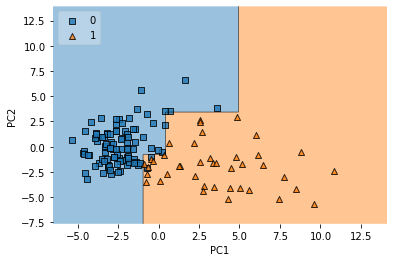

In [18]:
value = 1
width = 1.5
plot_decision_regions(X_pca, y_train, clf=dt_clf,
                      feature_index=[0, 1], # eixo x e y do gráfico serão as duas primeiras colunas dos dados, ou seja PC1 e PC2 da PCA
                      filler_feature_values={2: value, 3:value}, # como os dados são formados pelos 4 eixos da PCA e o gráfico só aceita duas dimensões, é necessário considerar os outros dois eixos para preencher as regiões de decisão
                      filler_feature_ranges={2: width, 3: width}, legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

### Exploring the PCA on the train dataset

In [19]:
X_train_std = scaler.transform(X_train)

pca = PCA(n_components=4)
X_train_pca = pca.fit_transform(X_train_std)


In [20]:
df_pca = pd.DataFrame(data=X_train_pca, columns = ['PC1', 'PC2', 'PC3', 'PC4'])
df_pca['diagnosis'] = y_train
df_pca

,PC1,PC2,PC3,PC4,diagnosis
0,4.836716,2.908668,-0.344112,0.582397,1
1,-1.159460,1.495043,-1.471893,-0.183453,0
2,-0.307427,-0.763738,-1.132140,-1.330907,0
3,2.838780,0.490873,-0.543573,-0.517257,1
4,-1.068165,-2.044484,-0.881309,-1.559012,0
...,...,...,...,...,...
393,5.053245,-1.629817,-1.356017,-0.089140,1
394,-3.097234,-1.760613,0.237025,-1.424468,0
395,5.050880,-1.464994,-1.328064,1.367995,1
396,-1.887409,1.681463,-2.061405,-1.070384,0


In [25]:
print('Explained variances for PC1, PC2, PC3 and PC4:', pca.explained_variance_ratio_)

Explained variances for PC1, PC2, PC3 and PC4: [0.44692384 0.19047361 0.09723025 0.06618167]


#### Visualizing the biplot with PC1 and PC2

<Figure size 432x288 with 0 Axes>

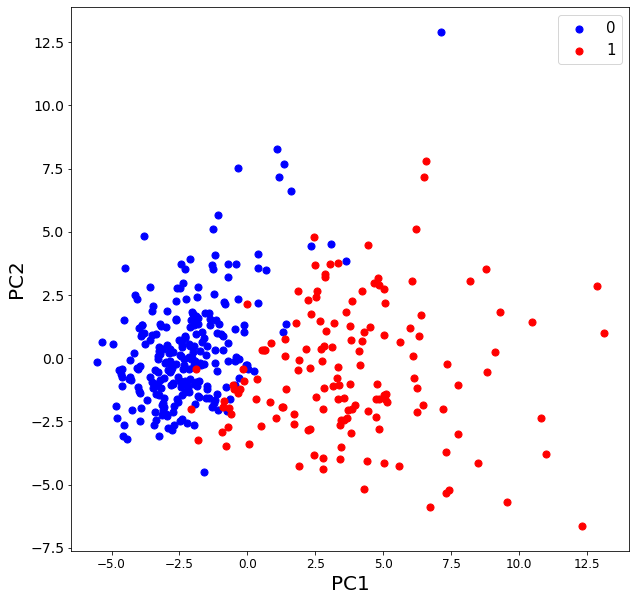

In [22]:
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
targets = [0, 1]
colors = ['b', 'r']
for target, color in zip(targets,colors):
    classes = df_pca['diagnosis'] == target
    plt.scatter(df_pca.loc[classes, 'PC1'],
    df_pca.loc[classes, 'PC2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

### A heatmap to visualize how each feature correlates with each PCA axis

In [23]:
df_features = df_clean.columns.values
df_features

array(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se',
       'smoothness_se', 'compactness_se', 'concavity_se',
       'concave points_se', 'symmetry_se', 'fractal_dimension_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst'], dtype=object)

<AxesSubplot:>

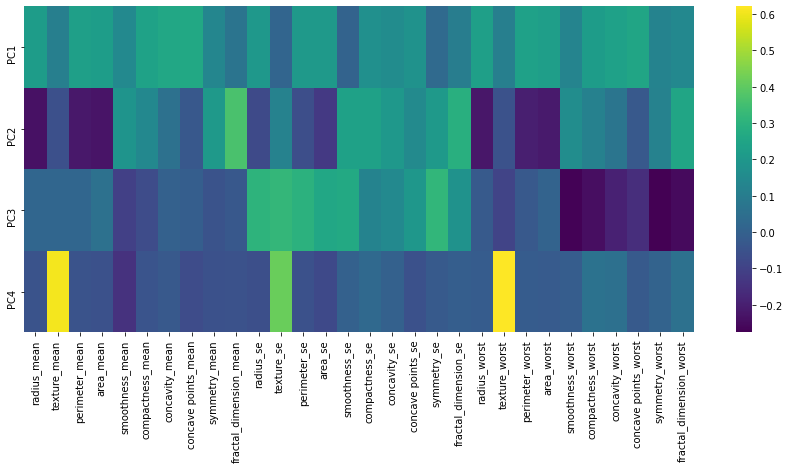

In [24]:
plt.figure(figsize=(15,6))

sns.heatmap(pca.components_, cmap='viridis',
            xticklabels=df_features, 
            yticklabels=['PC1', 'PC2', 'PC3', 'PC4'])

### Applying the selected decision tree model to the test dataset

In [26]:
X_test_std = scaler.transform(X_test)

# reduzir dimensionalidade
pca = PCA(n_components=4)
pca.fit(X_test_std)
X_test_pca = pca.transform(X_test_std)

In [27]:
y_test_pred = dt_clf.predict(X_test_pca)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.9415204678362573

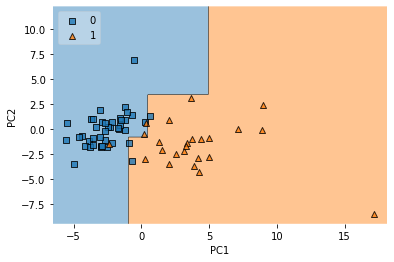

In [28]:
value = 1 # ainda não entendi muito bem como funcionam esses parâmetros para plotar região de decisão com mais de 2 features; conforme altera value e width aparecem mais ou menos dados no plot
width = 1.5
plot_decision_regions(X_test_pca, y_test, clf=dt_clf,
                      feature_index=[0, 1], # eixo x e y do gráfico serão as duas primeiras colunas dos dados, ou seja PC1 e PC2 da PCA
                      filler_feature_values={2: value, 3:value}, # como os dados são formados pelos 4 eixos da PCA e o gráfico só aceita duas dimensões, é necessário considerar os outros dois eixos para preencher as regiões de decisão
                      filler_feature_ranges={2: width, 3: width}, legend=2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()

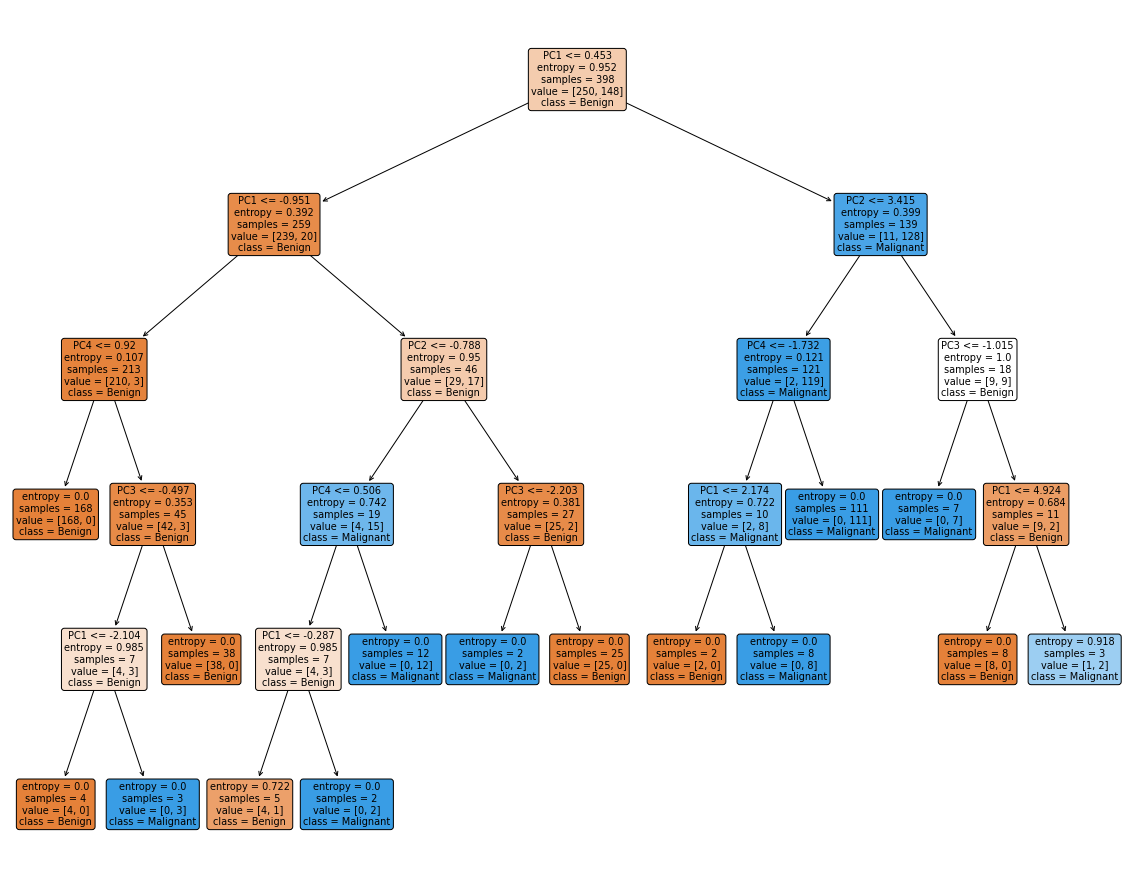

In [30]:
plt.figure(figsize=(20, 16))

plot_tree(dt_clf, filled=True, rounded=True,
          class_names=['Benign', 
                       'Malignant'],
          feature_names=['PC1', 'PC2',
                         'PC3', 'PC4']) 

plt.show()